In [10]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install pandas 

Note: you may need to restart the kernel to use updated packages.


In [12]:
import numpy as np
print("NumPy version:", np.__version__)
import pandas as pd
print("Pandas version:", pd.__version__)


NumPy version: 2.0.2
Pandas version: 2.2.3


In [13]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
print("Matplotlib version:", plt.matplotlib.__version__)
print("Seaborn version:", sns.__version__)

Matplotlib version: 3.9.4
Seaborn version: 0.13.2


In [16]:
df=pd.read_csv('mal_top2000_anime.csv',index_col=[0])

In [17]:
## Rows and columns
df.shape 

(2000, 11)

In [18]:
### First 5 rows
df.head(5)

,Name,Type,Score,Score Rank,Popularity Rank,Air Date,Studio,Num. of episodes,Genres,Theme(s),Demographic
0,Fullmetal Alchemist: Brotherhood,TV,9.14,1,3,"Apr 5, 2009 to Jul 4, 2010",['Bones'],64,"['Action', 'Adventure', 'Drama', 'Fantasy']",['Military'],Shounen
1,Spy x Family,TV,9.09,2,350,"Apr 9, 2022 to ?","['Wit Studio', ' CloverWorks']",12,"['Action', 'Comedy']",['Childcare'],Shounen
2,Shingeki no Kyojin Season 3 Part 2,TV,9.08,3,32,"Apr 29, 2019 to Jul 1, 2019",['Wit Studio'],10,"['Action', 'Drama']","['Gore', 'Military', 'Survival']",Shounen
3,Steins;Gate,TV,9.08,4,13,"Apr 6, 2011 to Sep 14, 2011",['White Fox'],24,"['Drama', 'Sci-Fi', 'Suspense']","['Psychological', 'Time Travel']",NaN
4,Gintama°,TV,9.08,5,335,"Apr 8, 2015 to Mar 30, 2016",['Bandai Namco Pictures'],51,"['Action', 'Comedy', 'Sci-Fi']","['Gag Humor', 'Historical', 'Parody', 'Samurai']",Shounen


In [19]:
## last five rows 
df.tail(5)

,Name,Type,Score,Score Rank,Popularity Rank,Air Date,Studio,Num. of episodes,Genres,Theme(s),Demographic
1995,Shugo Chara!! Doki,TV,7.41,1996,1766,"Oct 4, 2008 to Sep 25, 2009",['Satelight'],51,['Comedy'],"['Mahou Shoujo', 'School']",Shoujo
1996,Steins;Gate: Soumei Eichi no Cognitive Computing,ONA,7.41,1997,1748,"Oct 15, 2014 to Nov 12, 2014",['White Fox'],4,"['Comedy', 'Sci-Fi']",['None'],NaN
1997,Taiho Shichau zo: Second Season,TV,7.41,1998,5610,"Apr 7, 2001 to Sep 29, 2001",['Studio Deen'],26,"['Action', 'Comedy']","['Detective', 'Workplace']",Shounen
1998,Tanaka-kun wa Itsumo Kedaruge Specials,Special,7.41,1999,3394,"Jun 24, 2016 to Dec 22, 2016",['SILVER LINK.'],7,"['Comedy', 'Slice of Life']","['Iyashikei', 'School']",NaN
1999,Tiger & Bunny Movie 1: The Beginning,Movie,7.41,2000,3908,"Sep 22, 2012",['Sunrise'],1,"['Action', 'Comedy', 'Mystery']","['Adult Cast', 'Super Power']",NaN


In [20]:
## Check data types and missing values

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              2000 non-null   object 
 1   Type              2000 non-null   object 
 2   Score             2000 non-null   float64
 3   Score Rank        2000 non-null   int64  
 4   Popularity Rank   2000 non-null   int64  
 5   Air Date          2000 non-null   object 
 6   Studio            2000 non-null   object 
 7   Num. of episodes  2000 non-null   int64  
 8   Genres            2000 non-null   object 
 9   Theme(s)          2000 non-null   object 
 10  Demographic       973 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 187.5+ KB


In [21]:
## to check for basic statistics 
df.describe()

,Score,Score Rank,Popularity Rank,Num. of episodes
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,7.835575,1000.506000,2311.675500,16.863000
std,0.354037,577.501941,2061.082865,49.630271
min,7.410000,1.000000,1.000000,0.000000
25%,7.550000,500.750000,696.500000,1.000000
50%,7.740000,1000.500000,1778.000000,12.000000
75%,8.050000,1500.250000,3369.250000,21.000000
max,9.140000,2000.000000,12164.000000,1787.000000


In [22]:
## find out the null values (deal with it )

df.isnull().sum()

Name                   0
Type                   0
Score                  0
Score Rank             0
Popularity Rank        0
Air Date               0
Studio                 0
Num. of episodes       0
Genres                 0
Theme(s)               0
Demographic         1027
dtype: int64

In [23]:
df.duplicated().sum()

np.int64(1)

In [24]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr(method='pearson')
print(correlation_matrix)

                     Score  Score Rank  Popularity Rank  Num. of episodes
Score             1.000000   -0.945009        -0.366142          0.029998
Score Rank       -0.945009    1.000000         0.355976         -0.032347
Popularity Rank  -0.366142    0.355976         1.000000         -0.054855
Num. of episodes  0.029998   -0.032347        -0.054855          1.000000


<Axes: >

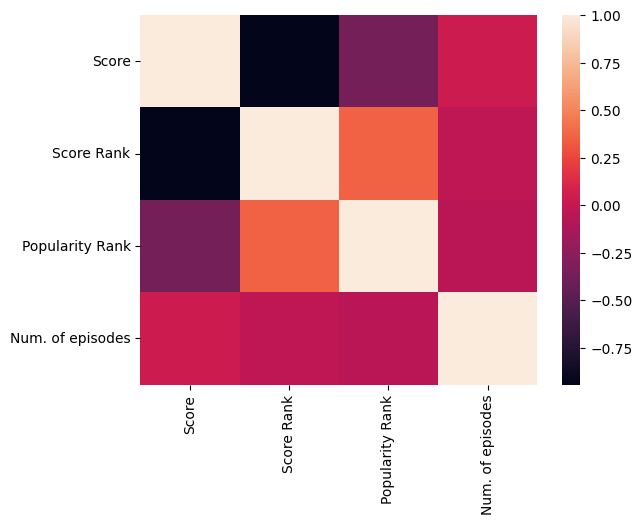

In [25]:
sns.heatmap(correlation_matrix)

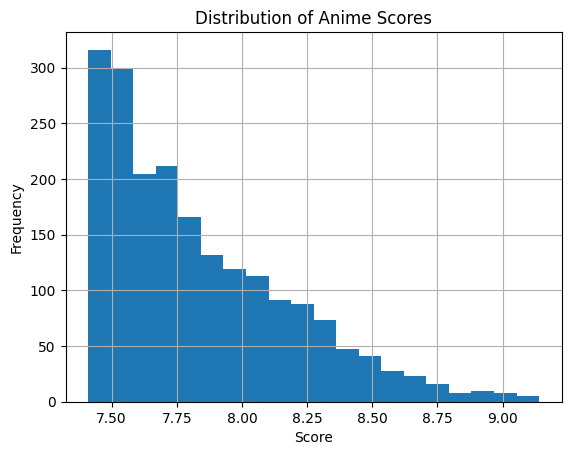

In [59]:
df['Score'].hist(bins=20)
plt.title('Distribution of Anime Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

The majority of anime have scores between 7.5 and 8.0.
Most anime with ratind 7.5 to 7.7 being the most frequent scores.
As scores increase, the frequency decreases,  anime with scores above 8.5 are less common.
few anime achieve scores close to 9.0, showing that only a small percentage are  high rated. This is in line with the mean that we got above


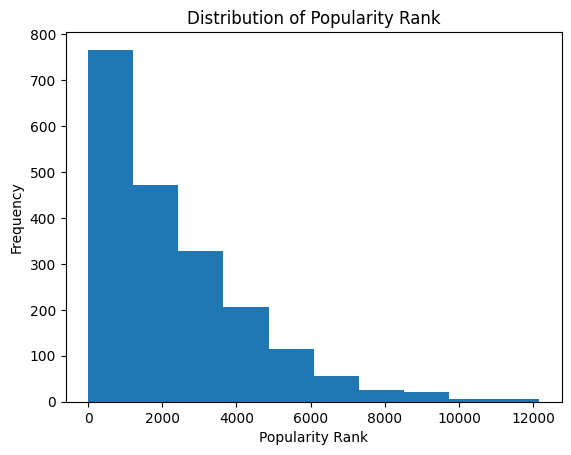

In [62]:
plt.hist(df['Popularity Rank'], bins=10)

plt.title('Distribution of Popularity Rank')
plt.xlabel('Popularity Rank')
plt.ylabel('Frequency')
plt.show()

Around 700 animes in the first bar. these are the most popular animes in the dataset. Fewer anime are present in the 2000 to 4000 rank range (around 400 entries), and this trend continues. 
right-skewed distribution, where most anime have low Popularity Ranks


Text(0.5, 1.0, 'Boxplot of Scores')

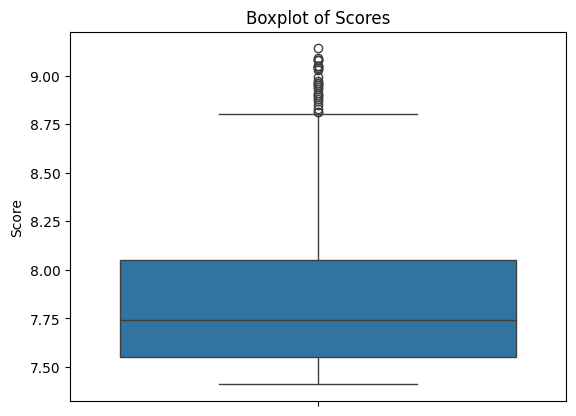

In [80]:
sns.boxplot(df['Score'])
plt.title('Boxplot of Scores')

The median is around 7.8, indicating that half of the anime have a score higher than this value and the other half lower.
some ouliers on the top. 

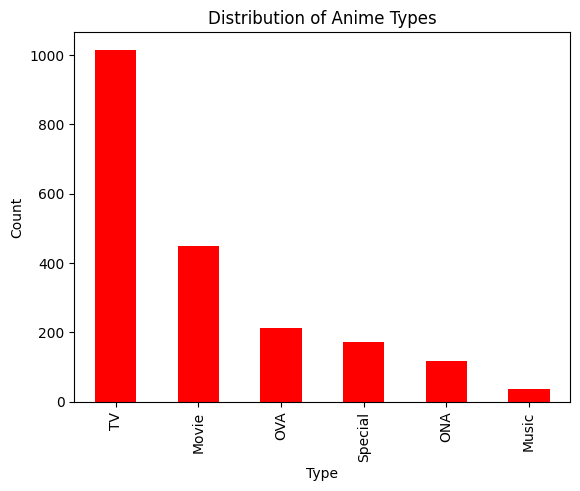

In [88]:
df['Type'].value_counts().plot(kind='bar', color='Red')
plt.title('Distribution of Anime Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

The "TV" category is the largest, with over 1000 entries. This suggests that most anime in the dataset are TV series

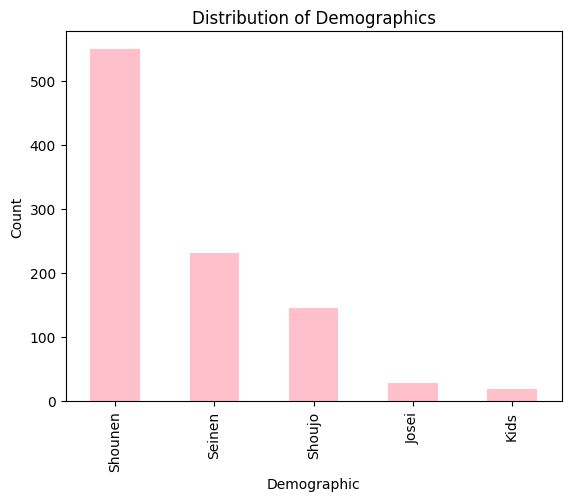

In [85]:
df['Demographic'].value_counts().plot(kind='bar', color='pink')
plt.title('Distribution of Demographics')
plt.xlabel('Demographic')
plt.ylabel('Count')
plt.show()

<Axes: ylabel='count'>

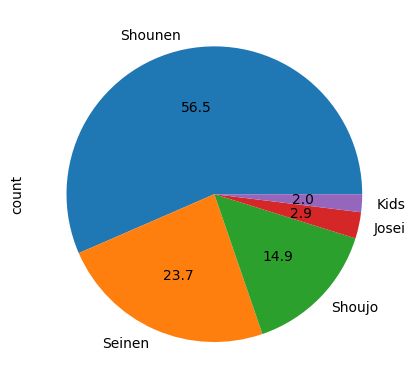

In [87]:

df['Demographic'].value_counts().plot(kind='pie', autopct = '%1.1f')


Shounen makes up the largest slice of the pie, accounting for 56.5% of the dataset,suggests that most anime are targeted at a young male demographic.


Text(0.5, 1.0, 'Score Distribution by Demographic')

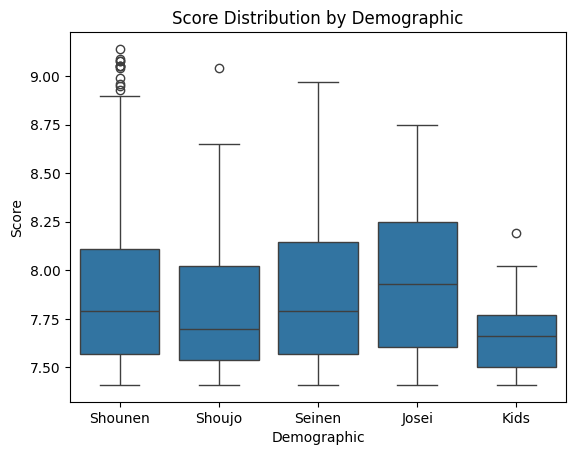

In [74]:
sns.boxplot (x='Demographic', y= 'Score', data=df)
plt.title('Score Distribution by Demographic')

Josei has the highest median score, out of all therefore suggesting that anime targeting adult women have overall higher rating overall.
Anime targeted at children tends to have more consistent scores.

Text(0.5, 1.0, 'Popularity Rank by Demographic')

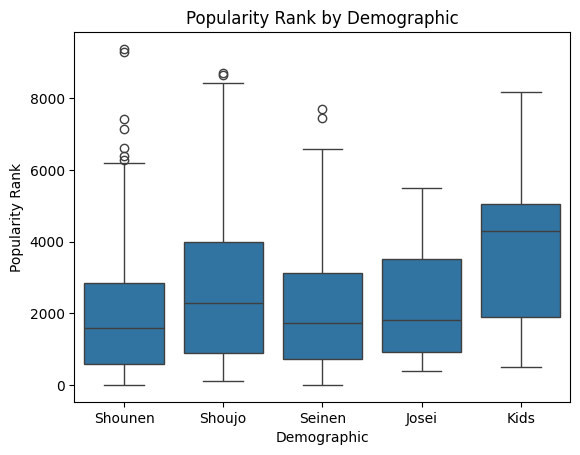

In [75]:
sns.boxplot (x='Demographic', y= 'Popularity Rank', data=df)
plt.title('Popularity Rank by Demographic')

Shounen dominates in popularity, with a lower median rank and more highly ranked anime.
Shounen has the most outliers showing that there are really low popularity shows in this demographic. 

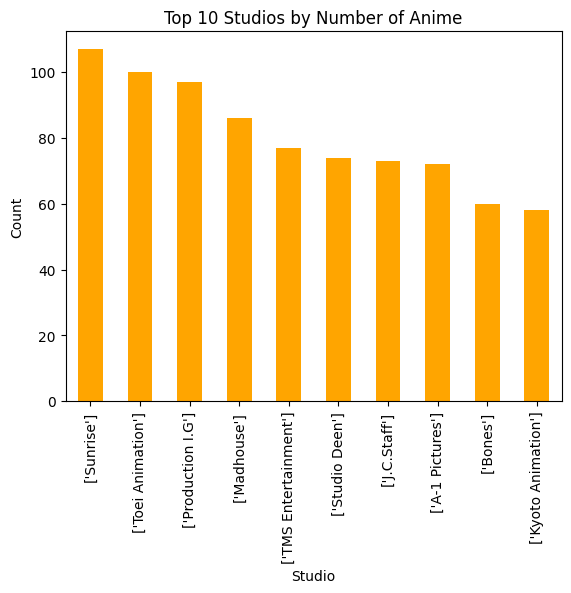

In [89]:
df['Studio'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Studios by Number of Anime')
plt.xlabel('Studio')
plt.ylabel('Count')
plt.show()

Text(0, 0.5, 'Score')

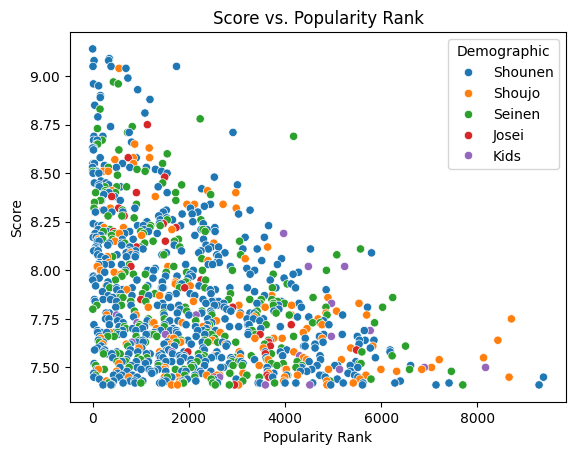

In [109]:
sns.scatterplot(x='Popularity Rank', y='Score', data=df, hue='Demographic')
plt.title('Score vs. Popularity Rank')
plt.xlabel('Popularity Rank')
plt.ylabel('Score')


Text(0.5, 1.0, 'Popularity Rank vs Number of Episodes')

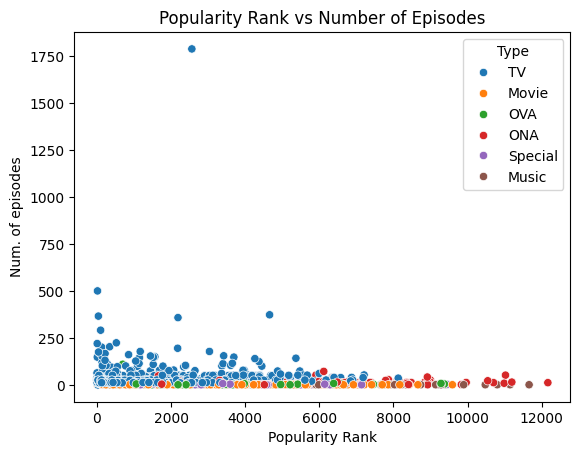

In [111]:
sns.scatterplot(x='Popularity Rank', y='Num. of episodes',data=df, hue='Type')
plt.title('Popularity Rank vs Number of Episodes')


TV anime (blue points) tend to have a much larger number of episodes, with one clear outlier reaching around 1750 episodes.

Text(0.5, 1.0, 'Score vs Number of Episodes')

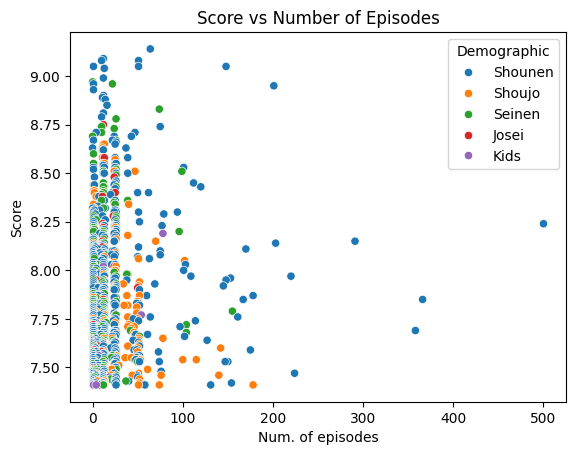

In [113]:
sns.scatterplot(x='Num. of episodes', y='Score',data=df, hue='Demographic')
plt.title('Score vs Number of Episodes')

In [ ]:
## Top 10 Animes by popularity 
## Top 10 animes by score

In [122]:
Top_anime_by_PR = df.sort_values('Popularity Rank').head(9)
Top_anime_by_PR 

,Name,Type,Score,Score Rank,Popularity Rank,Air Date,Studio,Num. of episodes,Genres,Theme(s),Demographic
102,Shingeki no Kyojin,TV,8.53,103,1,"Apr 7, 2013 to Sep 29, 2013",['Wit Studio'],25,"['Action', 'Drama']","['Gore', 'Military', 'Survival']",Shounen
69,Death Note,TV,8.63,70,2,"Oct 4, 2006 to Jun 27, 2007",['Madhouse'],37,"['Supernatural', 'Suspense']",['Psychological'],Shounen
0,Fullmetal Alchemist: Brotherhood,TV,9.14,1,3,"Apr 5, 2009 to Jul 4, 2010",['Bones'],64,"['Action', 'Adventure', 'Drama', 'Fantasy']",['Military'],Shounen
113,One Punch Man,TV,8.51,114,4,"Oct 5, 2015 to Dec 21, 2015",['Madhouse'],12,"['Action', 'Comedy']","['Parody', 'Super Power']",Seinen
628,Boku no Hero Academia,TV,7.95,629,6,"Apr 3, 2016 to Jun 26, 2016",['Bones'],13,['Action'],"['School', 'Super Power']",Shounen
878,Tokyo Ghoul,TV,7.80,879,7,"Jul 4, 2014 to Sep 19, 2014",['Studio Pierrot'],12,"['Action', 'Fantasy', 'Horror']","['Gore', 'Psychological']",Seinen
604,Naruto,TV,7.97,605,8,"Oct 3, 2002 to Feb 8, 2007",['Studio Pierrot'],220,"['Action', 'Adventure', 'Fantasy']",['Martial Arts'],Shounen
89,Kimetsu no Yaiba,TV,8.55,90,9,"Apr 6, 2019 to Sep 28, 2019",['ufotable'],26,"['Action', 'Fantasy']",['Historical'],Shounen
7,Hunter x Hunter (2011),TV,9.05,8,10,"Oct 2, 2011 to Sep 24, 2014",['Madhouse'],148,"['Action', 'Adventure', 'Fantasy']",['None'],Shounen


Text(0.5, 1.0, 'Top 10 Anime by Popularity Rank')

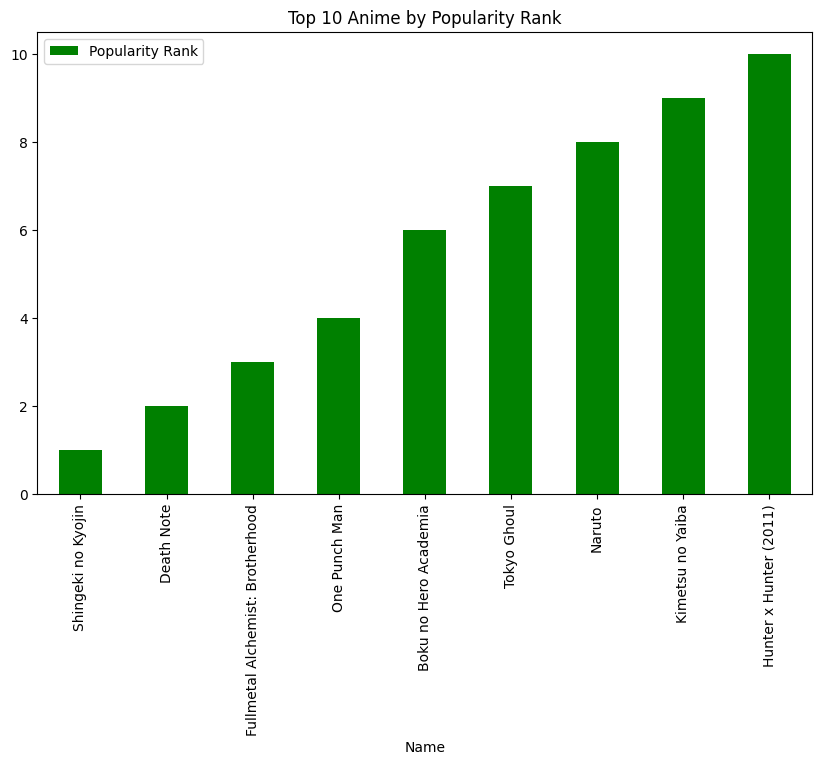

In [125]:

Top_anime_by_PR.plot(x='Name',y='Popularity Rank', kind = 'bar', color = 'green',figsize=(10, 6))
plt.title('Top 10 Anime by Popularity Rank')



In [127]:
Top_anime_by_ScoreRank = df.sort_values('Score Rank').head(9)
Top_anime_by_ScoreRank 

,Name,Type,Score,Score Rank,Popularity Rank,Air Date,Studio,Num. of episodes,Genres,Theme(s),Demographic
0,Fullmetal Alchemist: Brotherhood,TV,9.14,1,3,"Apr 5, 2009 to Jul 4, 2010",['Bones'],64,"['Action', 'Adventure', 'Drama', 'Fantasy']",['Military'],Shounen
1,Spy x Family,TV,9.09,2,350,"Apr 9, 2022 to ?","['Wit Studio', ' CloverWorks']",12,"['Action', 'Comedy']",['Childcare'],Shounen
2,Shingeki no Kyojin Season 3 Part 2,TV,9.08,3,32,"Apr 29, 2019 to Jul 1, 2019",['Wit Studio'],10,"['Action', 'Drama']","['Gore', 'Military', 'Survival']",Shounen
3,Steins;Gate,TV,9.08,4,13,"Apr 6, 2011 to Sep 14, 2011",['White Fox'],24,"['Drama', 'Sci-Fi', 'Suspense']","['Psychological', 'Time Travel']",NaN
4,Gintama°,TV,9.08,5,335,"Apr 8, 2015 to Mar 30, 2016",['Bandai Namco Pictures'],51,"['Action', 'Comedy', 'Sci-Fi']","['Gag Humor', 'Historical', 'Parody', 'Samurai']",Shounen
5,Gintama',TV,9.05,6,385,"Apr 4, 2011 to Mar 26, 2012",['Sunrise'],51,"['Action', 'Comedy', 'Sci-Fi']","['Gag Humor', 'Historical', 'Parody', 'Samurai']",Shounen
6,Gintama: The Final,Movie,9.05,7,1746,"Jan 8, 2021",['Bandai Namco Pictures'],1,"['Action', 'Comedy', 'Drama', 'Sci-Fi']","['Gag Humor', 'Historical', 'Parody', 'Samurai']",Shounen
7,Hunter x Hunter (2011),TV,9.05,8,10,"Oct 2, 2011 to Sep 24, 2014",['Madhouse'],148,"['Action', 'Adventure', 'Fantasy']",['None'],Shounen
8,Fruits Basket: The Final,TV,9.04,9,551,"Apr 6, 2021 to Jun 29, 2021",['TMS Entertainment'],13,"['Drama', 'Romance', 'Slice of Life', 'Superna...",['None'],Shoujo


Text(0.5, 1.0, 'Top 10 Anime by Popularity Rank')

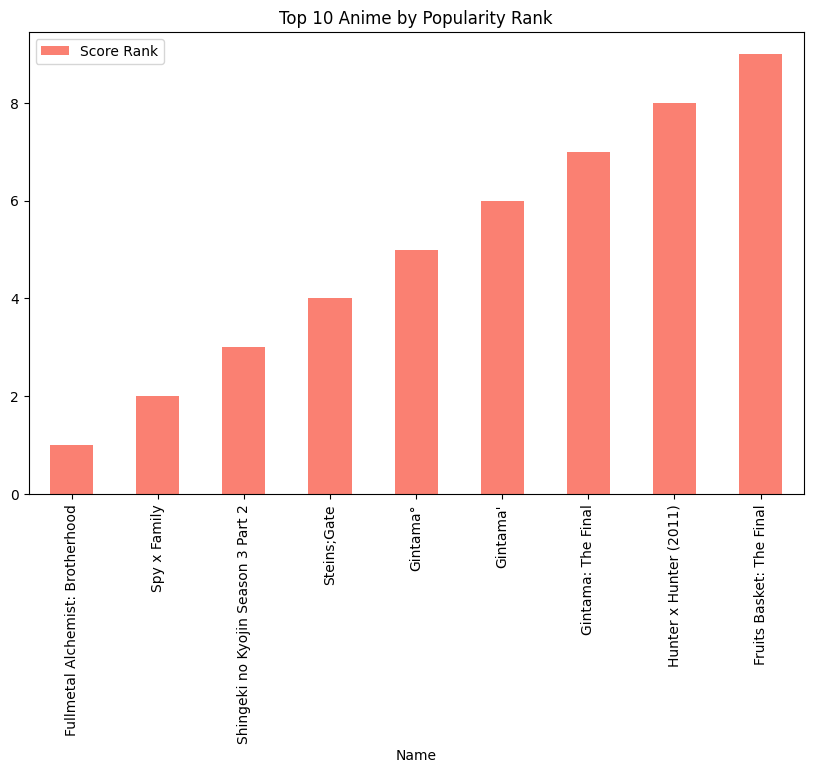

In [129]:
Top_anime_by_ScoreRank.plot(x='Name', y='Score Rank',kind='bar',color = 'salmon', figsize=(10,6))
plt.title('Top 10 Anime by Popularity Rank')